# Data Science and Machine Learning Assignment

## Task 2

This notebook showcases where an agent learns the best path to reach a goal using reinforcement learning. The goal is to:
1. Define **the maze** to train the agent and **the actions** for the agent.
2. Implement specific criterias for the **reward, choose_action, take_action and train_agent**.
3. Train the agent by **using a reinforcement model**.
4. Implement a function to **visualize the results**.


#### Install the required libraries

In [1]:
# Install required libraries (if not already installed)
#!pip install numpy matplotlib

#### Import the required libraries

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from IPython.display import clear_output

#### Define the maze environment

In [3]:
# Define the maze: 0 for free space, 1 for wall
maze = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
    [1, 1, 1, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

# Start
start_position = (1, 1)

# Goal
goal_position = (8, 8)

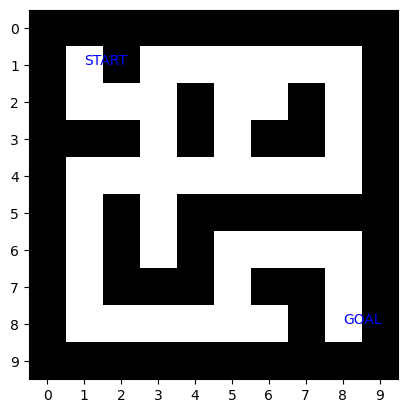

In [4]:
# Print the maze for visualization
plt.imshow(maze, cmap='binary')
plt.text(start_position[1], start_position[0], 'START', color='blue')
plt.text(goal_position[1], goal_position[0], 'GOAL', color='blue')

# Setting all the axes to be displayed
plt.xticks(ticks=range(maze.shape[1]))  # Set x ticks for each column
plt.yticks(ticks=range(maze.shape[0]))  # Set y ticks for each row

plt.show()

In [5]:
# Define the actions: 0 = up, 1 = down, 2 = left, 3 = right
actions = ['up', 'down', 'left', 'right']

In [6]:
# Function to choose an action based on the epsilon-greedy policy
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        # Random action is selected
        return random.choice([0, 1, 2, 3])
    else:
        # Chooses the action with the highest Q-value
        return np.argmax(q_table[state[0], state[1]])

In [7]:
# Function to take an action and move the agent in the maze
def take_action(state, action):
    new_state = list(state)
    
    # Action definitions: 0=up, 1=down, 2=left, 3=right
    if action == 0:  # Up
        new_state[0] -= 1
    elif action == 1:  # Down
        new_state[0] += 1
    elif action == 2:  # Left
        new_state[1] -= 1
    elif action == 3:  # Right
        new_state[1] += 1

    # Ensure the agent doesn't move out of bounds
    new_state[0] = max(0, min(new_state[0], maze.shape[0] - 1))
    new_state[1] = max(0, min(new_state[1], maze.shape[1] - 1))

    # Convert new_state to a tuple
    new_state = tuple(new_state)
    
    print(f"State: {state}, Action: {action}, New State: {new_state}") 

    # Check if the new state is a wall
    if maze[new_state[0], new_state[1]] == 1:
        # If it hits a wall, stays in the same place and receives a penalty
        return state, -1, False  
    
    # Check if the new state is the goal
    if new_state == goal_position:
        # Goal reached, returns positive reward and the episode ends
        return new_state, 10, True  
    
    # Returns a small negative reward for moving for the others
    return new_state, -0.2, False


In [8]:
# Training function to display the path
def train_agent(episodes):
    for episode in range(episodes):
        state = start_position
        done = False
        
        while not done:
            action = choose_action(state)  # Select an action
            next_state, reward, done = take_action(state, action)  # Take the action and get the new state
            
            # Update Q-value using the Q-learning formula
            q_table[state[0], state[1], action] += alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])
            
            state = next_state  # Move to the next state
            
            if done:  # When the agent has reached the goal, end this episode
                print(f"Episode {episode + 1}: Goal reached!")
                break


In [9]:
# Modified training function to show animation during training
def visualize_training(episodes):
    for episode in range(episodes):
        state = start_position
        done = False
        
        # Create a copy of the maze for visualization
        maze_copy = maze.copy()

        plt.figure(figsize=(6, 6))  # Initialize the plot for the maze

        while not done:
            clear_output(wait=True)  # Clear the previous plot to update the state
            
            action = choose_action(state)  # Choose the action based on the epsilon-greedy policy
            next_state, reward, done = take_action(state, action)  # Take the action and get the next state
            
            # Update Q-value
            q_table[state[0], state[1], action] += alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])
            
            # Mark the agent's current state on the maze copy for visualization
            maze_copy[state[0], state[1]] = 0.5  # Mark the agent's path with a color
            
            # Plot the maze
            plt.imshow(maze_copy, cmap='binary')
            
            # Highlight the start and goal positions
            plt.text(start_position[1], start_position[0], 'START', color='blue', ha='center', va='center',
                     fontsize=12, fontweight='bold', bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3'))
            plt.text(goal_position[1], goal_position[0], 'GOAL', color='green', ha='center', va='center',
                     fontsize=12, fontweight='bold', bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.3'))
            
            # Plot the agent's current position
            plt.text(state[1], state[0], 'X', color='red', ha='center', va='center', fontsize=12, fontweight='bold')

            # Customize the ticks
            plt.xticks(np.arange(maze.shape[1]))  # Set x ticks for each column
            plt.yticks(np.arange(maze.shape[0]))  # Set y ticks for each row
            
            plt.grid(False)  # Hide grid lines

            # Redraw the plot to update the figure
            plt.draw()
            
            # Pause to show the step visually
            plt.pause(0.5)
            
            state = next_state  # Move to the next state

            if done:  # Stops if the agent reaches the goal
                
                clear_output(wait=True)  # Clear the previous plot to update the state
            
                # Mark the agent's current state on the maze copy for visualization
                maze_copy[state[0], state[1]] = 0.5  # Mark the agent's path with a color
            
                # Plot the maze
                plt.imshow(maze_copy, cmap='binary')
            
                # Highlight the start and goal positions
                plt.text(start_position[1], start_position[0], 'START', color='blue', ha='center', va='center',
                     fontsize=12, fontweight='bold', bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3'))
                plt.text(goal_position[1], goal_position[0], 'GOAL', color='green', ha='center', va='center',
                     fontsize=12, fontweight='bold', bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.3'))
            
                # Plot the agent's current position
                plt.text(state[1], state[0], 'X', color='red', ha='center', va='center', fontsize=12, fontweight='bold')

                # Customize the ticks
                plt.xticks(np.arange(maze.shape[1]))  # Set x ticks for each column
                plt.yticks(np.arange(maze.shape[0]))  # Set y ticks for each row
            
                plt.grid(False)  # Hide grid lines

                # Redraw the plot to update the figure
                plt.draw()
                
                print(f"Episode {episode + 1}: Goal reached!")
                break
    
    plt.show()



In [10]:
# Initialize the Q-table (10x10 grid with 4 possible actions)
q_table = np.zeros((maze.shape[0], maze.shape[1], len(actions)))

# Define hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.8  # Exploration rate (epsilon-greedy)

In [11]:
# Train the agent for 500 episodes 
train_agent(500)

# Print the final Q-table
print(q_table)

State: (1, 1), Action: 1, New State: (2, 1)
State: (2, 1), Action: 0, New State: (1, 1)
State: (1, 1), Action: 3, New State: (1, 2)
State: (1, 1), Action: 2, New State: (1, 0)
State: (1, 1), Action: 2, New State: (1, 0)
State: (1, 1), Action: 1, New State: (2, 1)
State: (2, 1), Action: 1, New State: (3, 1)
State: (2, 1), Action: 1, New State: (3, 1)
State: (2, 1), Action: 2, New State: (2, 0)
State: (2, 1), Action: 3, New State: (2, 2)
State: (2, 2), Action: 1, New State: (3, 2)
State: (2, 2), Action: 0, New State: (1, 2)
State: (2, 2), Action: 0, New State: (1, 2)
State: (2, 2), Action: 2, New State: (2, 1)
State: (2, 1), Action: 3, New State: (2, 2)
State: (2, 2), Action: 3, New State: (2, 3)
State: (2, 3), Action: 1, New State: (3, 3)
State: (3, 3), Action: 2, New State: (3, 2)
State: (3, 3), Action: 0, New State: (2, 3)
State: (2, 3), Action: 2, New State: (2, 2)
State: (2, 2), Action: 1, New State: (3, 2)
State: (2, 2), Action: 3, New State: (2, 3)
State: (2, 3), Action: 0, New St

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Episode 10: Goal reached!


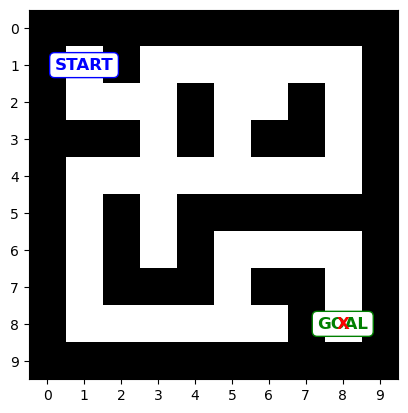

In [12]:
# visualize the training
visualize_training(10) 

# For simplicity in visualizing the training I have only used 10 epsisodes for the visual display 
# but to get the q_table I have trained for 500 episodes

In [13]:
# Function to visualize the agent's best path after training
def agent_path():
    state = start_position
    path = [state]  # Track the path from start to goal
    
    # Simulate the agent's movement based on the learned Q-table
    for _ in range(100):  # Limit to 100 steps to avoid infinite loops
        action = np.argmax(q_table[state[0], state[1]])  # Choose the best action based on Q-table
        next_state, _, done = take_action(state, action)
        path.append(next_state)  # Add the step in the path
        state = next_state  # Update the agent's position
        
        if done:  # When the goal is reached, break out of the loop
            break


In [14]:
# View the agent's best path after training
agent_path()

State: (1, 1), Action: 1, New State: (2, 1)
State: (2, 1), Action: 3, New State: (2, 2)
State: (2, 2), Action: 3, New State: (2, 3)
State: (2, 3), Action: 1, New State: (3, 3)
State: (3, 3), Action: 1, New State: (4, 3)
State: (4, 3), Action: 2, New State: (4, 2)
State: (4, 2), Action: 2, New State: (4, 1)
State: (4, 1), Action: 1, New State: (5, 1)
State: (5, 1), Action: 1, New State: (6, 1)
State: (6, 1), Action: 1, New State: (7, 1)
State: (7, 1), Action: 1, New State: (8, 1)
State: (8, 1), Action: 3, New State: (8, 2)
State: (8, 2), Action: 3, New State: (8, 3)
State: (8, 3), Action: 3, New State: (8, 4)
State: (8, 4), Action: 3, New State: (8, 5)
State: (8, 5), Action: 0, New State: (7, 5)
State: (7, 5), Action: 0, New State: (6, 5)
State: (6, 5), Action: 3, New State: (6, 6)
State: (6, 6), Action: 3, New State: (6, 7)
State: (6, 7), Action: 3, New State: (6, 8)
State: (6, 8), Action: 1, New State: (7, 8)
State: (7, 8), Action: 1, New State: (8, 8)


In [15]:
# Function to visualize the agent's path step by step
def visualize_path():
    state = start_position
    path = [state]  # Track the agent's path from start to goal
    
    # Create a copy of the maze for visualization
    maze_copy = maze.copy()

    # Plot the initial maze
    plt.figure(figsize=(6, 6))
    
    for step in range(100):  # Limit the number of steps to 100
        clear_output(wait=True)  # Clear the previous plot to show the new step
        
        # Choose the best action based on Q-table
        action = np.argmax(q_table[state[0], state[1]])  
        
        # Take the action and move to the next state
        next_state, _, done = take_action(state, action)
        
        # Update the path and mark the new state
        path.append(next_state)
        state = next_state
        
        # Mark the current state in the maze copy for visualization
        maze_copy[state[0], state[1]] = 0.5  
        
        # Update the maze image
        plt.imshow(maze_copy, cmap='binary')

        # Highlight the start and goal positions
        plt.text(start_position[1], start_position[0], 'START', color='blue', ha='center', va='center',
                 fontsize=12, fontweight='bold', bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3'))
        plt.text(goal_position[1], goal_position[0], 'GOAL', color='green', ha='center', va='center',
                 fontsize=12, fontweight='bold', bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.3'))

        # Plot the agent's current position
        plt.text(state[1], state[0], 'X', color='red', ha='center', va='center', fontsize=12, fontweight='bold')

        # Customize the ticks
        plt.xticks(np.arange(maze.shape[1]))  # Set x ticks for each column
        plt.yticks(np.arange(maze.shape[0]))  # Set y ticks for each row

        plt.grid(False)  # Hide grid lines

        # Redraw the plot to show the update
        plt.draw()
        
        # Pause to visually show the update before the next move
        plt.pause(0.1)  # Pause for 0.1 seconds to show each step
        
        if done:  # Stop if the agent reaches the goal
            print("Goal reached!")
            break
    
    plt.show()


State: (7, 8), Action: 1, New State: (8, 8)


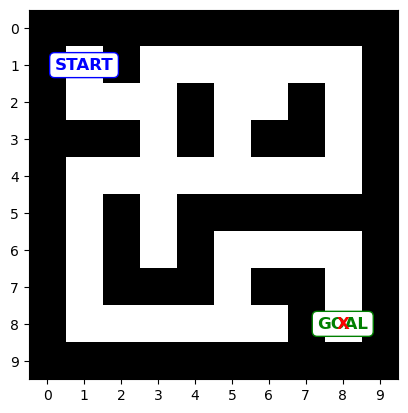

Goal reached!


In [16]:
# Visualize the agent's path step by step after training
visualize_path()